In [1]:
# load and the test weekly fpl scrape
season="2019-20"
gw=9
model_type="dt"

In [2]:
import os
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline
import pickle

In [3]:
os.chdir(os.path.join(os.getcwd(), "..", "..", "data"));

In [4]:
random_state = np.random.seed(24)

In [5]:
X_train = pd.read_csv("x-train.csv");
X_test = pd.read_csv("x-test.csv");

In [6]:
y_train = pd.read_csv("y-train.csv");
y_test = pd.read_csv("y-test.csv");

In [7]:
parameters = {
    'max_depth': [2, 4, 8],
}

In [8]:
regressor = DecisionTreeRegressor(random_state=random_state)

In [9]:
# clf = GridSearchCV(regressor, parameters, scoring='r2', cv=5, n_jobs=-1, verbose=2)

In [10]:
regressor.fit(X_train, y_train)  

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [11]:
# clf.best_params_

In [12]:
# clf.best_score_

In [13]:
# regressor = clf.best_estimator_

In [14]:
y_pred = regressor.predict(X_test)

In [15]:
def getInRange(actual, predicted, lower_bound=0, upper_bound=1):
    return ((actual - predicted) >= lower_bound) and ((actual - predicted) <= upper_bound)

In [16]:
pred_df = pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': y_pred.flatten()})

In [17]:
pred_df["in_range"] = pred_df.apply(lambda row: getInRange(row["Actual"], row["Predicted"], 0, 1), axis=1)

In [18]:
print("In range: {0:.2f}".format(pred_df[pred_df["in_range"] == True].shape[0]/pred_df.shape[0]))

In range: 0.61


In [19]:
pred_df.head(25)

,Actual,Predicted,in_range
0,0.0,0.0,True
1,0.0,0.0,True
2,7.0,6.0,True
3,2.0,0.0,False
4,0.0,0.0,True
5,0.0,0.0,True
6,0.0,0.0,True
7,0.0,0.0,True
8,0.0,1.0,False
9,2.0,2.0,True


In [20]:
test_df = pred_df.head(25)

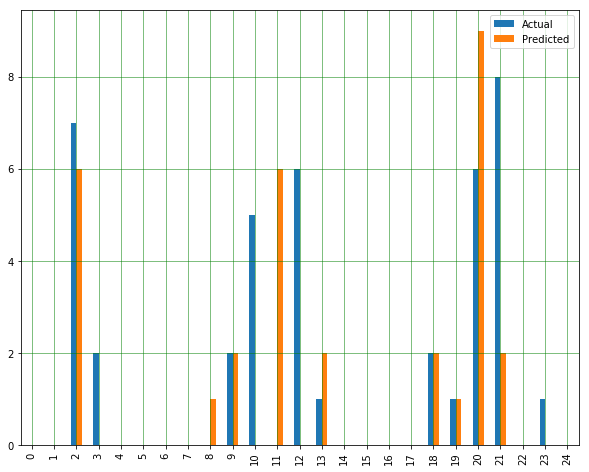

In [21]:
test_df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('R2 score:', metrics.r2_score(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.3324350714015574
R2 score: -0.45104287127949205
Mean Squared Error: 5.799425939303141
Root Mean Squared Error: 2.4081997299441635


In [23]:
filename = '{}-model.pkl'.format(model_type)

In [24]:
gw_dir = os.path.join(os.getcwd(), "..", "model", season, str(gw))

In [25]:
if not os.path.exists(gw_dir):
    os.makedirs(gw_dir)

In [26]:
os.chdir(gw_dir)

In [27]:
with open(filename, 'wb') as file:
    pickle.dump(regressor, file)